## Data Manipulation

In [1]:
import csv
import matplotlib.pyplot as plt
import networkx as nx
import pandas as pd
import numpy as np

# read .dat to a list of lists
datContent = [i.strip().split() for i in open("krackad.dat").readlines()]

# Create 21 x 21 x 21 array
flat_data = np.array(datContent[26:])
data = np.reshape(flat_data, (21, 21, 21)).astype(int)

data.shape

(21, 21, 21)

## Aggregation Methods

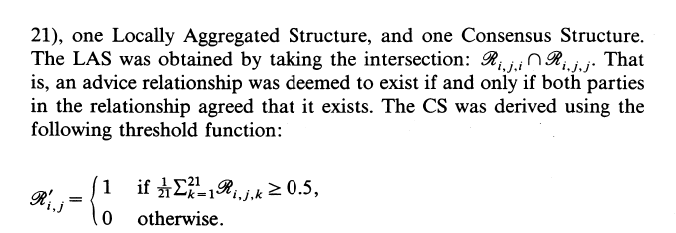

In [2]:
def consensus_structure(array):    
    return array.mean(axis=0).round()

def locally_aggregated_structures(array):
    las_array = np.zeros((21,21))

    for p1 in range(21):
        for p2 in range(21):
            if array[p1, p1, p2] == 1 and array[p2, p1, p2] == 1:
                las_array[p1, p2] = 1         
    return las_array


In [3]:
def plot_network(array):
    G = nx.DiGraph()
    G.add_nodes_from(range(1, 22))

    edges = np.argwhere(array>0) + 1
    G.add_edges_from(edges)
    return G

## Network Plots

In [4]:
plt.rcParams["figure.figsize"] = (12,8)

### Consensus Structure (CS)

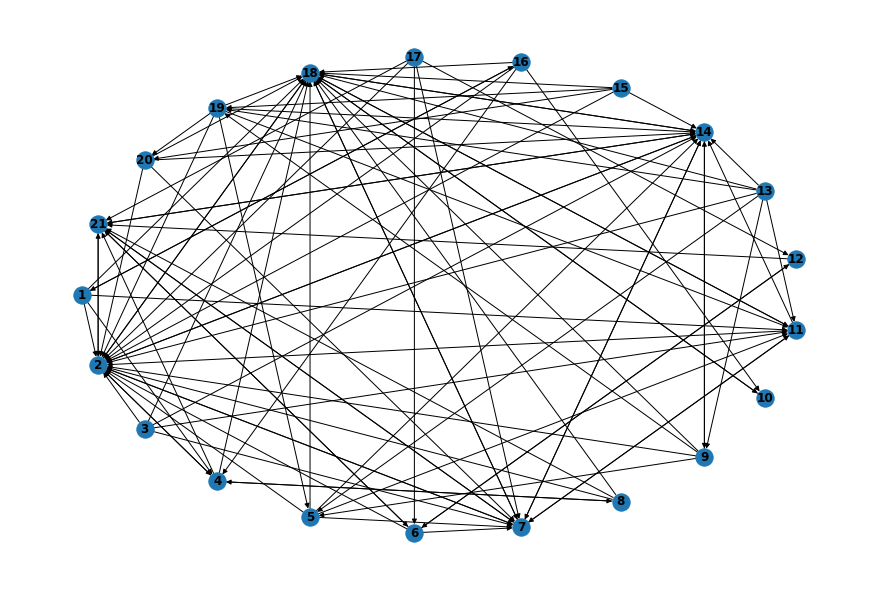

In [5]:
data_cons = consensus_structure(data)

G_cs = plot_network(data_cons)

nx.draw_shell(G_cs, with_labels=True, font_weight='bold')

In [6]:
df_cs = pd.DataFrame([], index=range(1, 22))
df_cs['CS Out Degree'] = pd.Series(dict(G_cs.out_degree()))
df_cs['CS In Degree'] = pd.Series(dict(G_cs.in_degree()))

df_cs

,CS Out Degree,CS In Degree
1,5,1
2,5,18
3,5,0
4,4,4
5,5,3
6,4,3
7,5,10
8,4,1
9,5,2
10,1,2


In [7]:
## add betweenness score
G = nx.from_numpy_matrix(data_cons)
btw_cons = nx.betweenness_centrality(G)

data_values = btw_cons.values()
df_cs['CS betweenness'] = data_values

In [8]:
df_cs

,CS Out Degree,CS In Degree,CS betweenness
1,5,1,0.003509
2,5,18,0.292341
3,5,0,0.000000
4,4,4,0.015354
5,5,3,0.004123
6,4,3,0.019803
7,5,10,0.058621
8,4,1,0.002794
9,5,2,0.000000
10,1,2,0.000000


### Locally Aggregated Structure (LAS) 

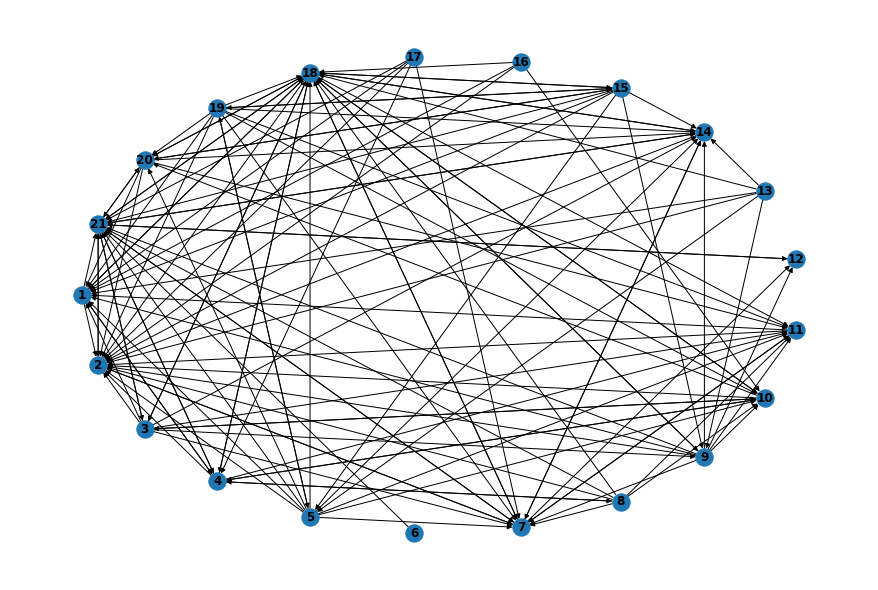

In [9]:
data_las = locally_aggregated_structures(data)

G_las = plot_network(data_las)

nx.draw_shell(G_las, with_labels=True, font_weight='bold')

In [10]:
df_las = pd.DataFrame([], index=range(1, 22))
df_las['LAS Out Degree'] = pd.Series(dict(G_las.out_degree()))
df_las['LAS In Degree'] = pd.Series(dict(G_las.in_degree()))

df_las

,LAS Out Degree,LAS In Degree
1,4,12
2,2,18
3,9,3
4,7,6
5,10,3
6,1,0
7,6,11
8,7,1
9,9,4
10,5,8


In [11]:
## add betweenness score
G = nx.from_numpy_matrix(data_las)
btw_las = nx.betweenness_centrality(G)

data_values = btw_las.values()
df_las['LAS betweenness'] = data_values

In [12]:
df_las

,LAS Out Degree,LAS In Degree,LAS betweenness
1,4,12,0.057153
2,2,18,0.095088
3,9,3,0.006811
4,7,6,0.010906
5,10,3,0.019417
6,1,0,0.000000
7,6,11,0.045737
8,7,1,0.004582
9,9,4,0.044952
10,5,8,0.023536


### Summary of Node Degrees 

In [13]:
network_degrees = df_cs.merge(df_las,
                              left_index=True, 
                              right_index=True)
network_degrees

,CS Out Degree,CS In Degree,CS betweenness,LAS Out Degree,LAS In Degree,LAS betweenness
1,5,1,0.003509,4,12,0.057153
2,5,18,0.292341,2,18,0.095088
3,5,0,0.000000,9,3,0.006811
4,4,4,0.015354,7,6,0.010906
5,5,3,0.004123,10,3,0.019417
6,4,3,0.019803,1,0,0.000000
7,5,10,0.058621,6,11,0.045737
8,4,1,0.002794,7,1,0.004582
9,5,2,0.000000,9,4,0.044952
10,1,2,0.000000,5,8,0.023536


# Question 3

The network of a company can be affected by employees moving on and leaving the company. Identify the 
employee whose leaving the company would have the greatest impact on the social structure of the 
network.
- employees who have a high centrality score (indegree, outdegree, betweenness)
- in terms of the matrix: removing which person and their links changes the matrix the most 
- what is typcial for an employee who has the greatest impact on the social structure

In [14]:
## employees with highest indegree
# CS
network_degrees['CS In Degree'].sort_values(ascending=False)[:5]

2     18
18    16
14    12
7     10
21     8
Name: CS In Degree, dtype: int64

In [15]:
## employees with highest indegree
# LAS
network_degrees['LAS In Degree'].sort_values(ascending=False)[:5]

2     18
21    15
18    15
1     12
7     11
Name: LAS In Degree, dtype: int64

In [16]:
## employees with highest betweenness
# CS
network_degrees['CS betweenness'].sort_values(ascending=False)[:5]

2     0.292341
18    0.199772
21    0.070921
7     0.058621
14    0.052556
Name: CS betweenness, dtype: float64

In [17]:
## employees with highest betweenness
# LAS
network_degrees['LAS betweenness'].sort_values(ascending=False)[:5]

21    0.165384
2     0.095088
18    0.072544
1     0.057153
7     0.045737
Name: LAS betweenness, dtype: float64

### Change of network when removing an employee

In [18]:
def create_network_without_x(employee, matrix):
    # delete xth row from matrix
    new_matrix = np.delete(matrix, (employee-1), axis=0)
    # delete xth column from matrix
    new_matrix = np.delete(new_matrix, (employee-1), axis=1)
    # compute centrality on new network
    G = plot_network(new_matrix)
    index = [x for x in range(1,22) if x != employee]
    df = pd.DataFrame([], index=index)
    df['New Outdegree'] = pd.Series(dict(G.out_degree()))
    df['New Indegree'] = pd.Series(dict(G.in_degree()))
    
    return df

In [19]:
def avg_relative_change(series1, series2):
    change_rates = []
    for i in range(len(series1)):
        if series1.iloc[i] == 0:
            continue
        else:
            change_rate = abs(series2.iloc[i]-series1.iloc[i])/series1.iloc[i]
            change_rates.append(change_rate)
    return sum(change_rates)/len(change_rates)

In [20]:
# based on average change rate
def change_old_new_network(matrix_curr, df_curr_indegree, df_curr_outdegree):
    df_change = pd.DataFrame(columns = ['Indegree change','Outdegree change'], index=range(1, 22))
    for i in range(1,22):
        df_curr_indegree_no_x = df_curr_indegree.drop(i)
        df_curr_outdegree_no_x = df_curr_outdegree.drop(i)
        df_new = create_network_without_x(i,matrix_curr)
        df_change.at[i, 'Indegree change'] = avg_relative_change(df_curr_indegree_no_x,df_new['New Indegree'])
        df_change.at[i, 'Outdegree change'] = avg_relative_change(df_curr_outdegree_no_x,df_new['New Outdegree'])
        
    return df_change

In [21]:
df_change_rate = change_old_new_network(data_cons, df_cs['CS In Degree'], df_cs['CS Out Degree'])
df_change_rate

,Indegree change,Outdegree change
1,1.021466,0.508452
2,0.938132,0.483929
3,0.886216,0.488452
4,0.953063,0.515952
5,0.92598,0.418452
6,0.809908,0.488452
7,0.71348,0.483929
8,0.697855,0.443452
9,0.738219,0.373095
10,0.553757,0.260952


In [22]:
## most change for indegree
df_change_rate['Indegree change'].sort_values(ascending=False)[:5]

1    1.021466
4    0.953063
2    0.938132
5     0.92598
3    0.886216
Name: Indegree change, dtype: object

In [23]:
## most change for outdegree
df_change_rate['Outdegree change'].sort_values(ascending=False)[:5]

4    0.515952
1    0.508452
3    0.488452
6    0.488452
7    0.483929
Name: Outdegree change, dtype: object

In [24]:
## least change for indegree
df_change_rate['Indegree change'].sort_values(ascending=True)[:5]

21    0.035764
20    0.081337
19    0.292349
18    0.325942
17    0.331454
Name: Indegree change, dtype: object

In [25]:
## least change for outdegree
df_change_rate['Outdegree change'].sort_values(ascending=True)[:5]

20    0.068333
17    0.076667
15    0.076667
13    0.076667
19    0.077143
Name: Outdegree change, dtype: object

## Question 4

The social network of a company is perceived differently by different individuals. Are there individuals 
whose view of the world is so different from that of the majority that this causes concern? 
- correlations between own slice and two aggregations 
- percent confirmed indegree/outdegree

In [26]:
def create_df_kth_slices(kth_matrix):
    G = plot_network(kth_matrix)
    df = pd.DataFrame([], index=range(1, 22))
    df['K Out Degree'] = pd.Series(dict(G.out_degree()))
    df['K In Degree'] = pd.Series(dict(G.in_degree()))
    
    G = nx.from_numpy_matrix(kth_matrix)
    btw_cons = nx.betweenness_centrality(G)
    data_values = btw_cons.values()
    df['K betweenness'] = data_values
    
    return df

In [27]:
df_correlations = pd.DataFrame(columns = ['Corr Indegree LAS','Corr Outdegree LAS','% confirmed Indegree LAS',
                                          '% confirmed Outdegree LAS','Corr Indegree CS','Corr Outdegree CS', 
                                          '% confirmed Indegree CS','% confirmed Outdegree CS'],index=range(1, 22))
for i in range(1, 22):
    df_k = create_df_kth_slices(data[i-1])
    df_correlations.at[i,'Corr Indegree LAS'] = df_k['K In Degree'].corr(df_las['LAS In Degree'])
    df_correlations.at[i,'Corr Outdegree LAS'] = df_k['K Out Degree'].corr(df_las['LAS Out Degree'])
    df_correlations.at[i,'% confirmed Indegree LAS'] = (df_las['LAS In Degree']/df_k['K In Degree']).mean()
    df_correlations.at[i,'% confirmed Outdegree LAS'] = (df_las['LAS Out Degree']/df_k['K Out Degree']).mean()
    df_correlations.at[i,'Corr Indegree CS'] = df_k['K In Degree'].corr(df_cs['CS In Degree'])
    df_correlations.at[i,'Corr Outdegree CS'] = df_k['K Out Degree'].corr(df_cs['CS Out Degree'])
    df_correlations.at[i,'% confirmed Indegree CS'] = (df_cs['CS In Degree']/df_k['K In Degree']).mean()
    df_correlations.at[i,'% confirmed Outdegree CS'] = (df_cs['CS Out Degree']/df_k['K Out Degree']).mean()
    
df_correlations['Mean Corr Degrees LAS'] = df_correlations[['Corr Indegree LAS','Corr Outdegree LAS']].mean(axis=1)
df_correlations['Mean Corr Degrees CS'] = df_correlations[['Corr Indegree CS','Corr Outdegree CS']].mean(axis=1)

In [28]:
df_correlations

,Corr Indegree LAS,Corr Outdegree LAS,% confirmed Indegree LAS,% confirmed Outdegree LAS,Corr Indegree CS,Corr Outdegree CS,% confirmed Indegree CS,% confirmed Outdegree CS,Mean Corr Degrees LAS,Mean Corr Degrees CS
1,0.329857,0.02135,0.47915,0.515357,0.334248,0.154501,0.349171,0.381262,0.175604,0.244374
2,0.781322,0.458301,inf,1.278193,0.748305,0.217303,inf,1.006463,0.619811,0.482804
3,0.510774,-0.161466,0.829099,0.825167,0.746157,-0.075382,0.443811,0.602862,0.174654,0.335387
4,0.59638,0.287865,0.706998,0.743859,0.660089,0.191337,0.443338,0.544301,0.442122,0.425713
5,0.630738,0.007755,0.837017,inf,0.788102,0.345259,0.504246,inf,0.319247,0.566680
6,0.60353,0.401301,inf,2.626984,0.648421,0.254151,inf,2.011905,0.502415,0.451286
7,0.365045,0.020333,1.307442,0.940367,0.58527,0.33795,0.781749,0.664066,0.192689,0.461610
8,0.758126,0.394362,inf,0.980915,0.897628,0.484496,inf,0.752362,0.576244,0.691062
9,0.751579,-0.034948,0.762325,0.944533,0.830121,0.436395,0.5405,0.671862,0.358316,0.633258
10,0.557776,0.330136,0.875797,0.929645,0.659322,-0.174078,0.579718,0.716708,0.443956,0.242622


In [29]:
# rank people by overall correlation with LAS and CS
df_correlations['Mean Corr Degrees LAS'].sort_values(ascending=True)[:5]

3     0.174654
1     0.175604
7     0.192689
15    0.295387
5     0.319247
Name: Mean Corr Degrees LAS, dtype: float64

In [30]:
df_correlations['Mean Corr Degrees CS'].sort_values(ascending=True)[:5]

10    0.242622
1     0.244374
3     0.335387
21    0.423735
4     0.425713
Name: Mean Corr Degrees CS, dtype: float64

In [31]:
# conclusion: 1 and 3 score low in both rankings
#             10 and 7 also have low correlations 

### Identify friendship groups based on friend network

In [32]:
# read in friend network data
datContent = [i.strip().split() for i in open("krackfr.dat").readlines()]

# Create 21 x 21 x 21 array
flat_data = np.array(datContent[26:])
data2 = np.reshape(flat_data, (21, 21, 21)).astype(int)

data2.shape

(21, 21, 21)

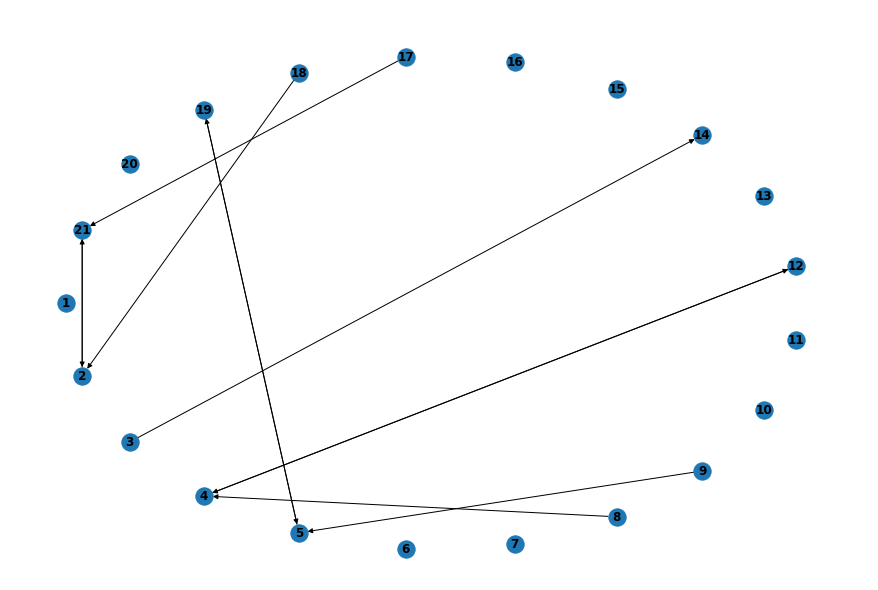

In [33]:
# create cons graph and plot it
data2_cons = consensus_structure(data2)
G2_cs = plot_network(data2_cons)

nx.draw_shell(G2_cs, with_labels=True, font_weight='bold')

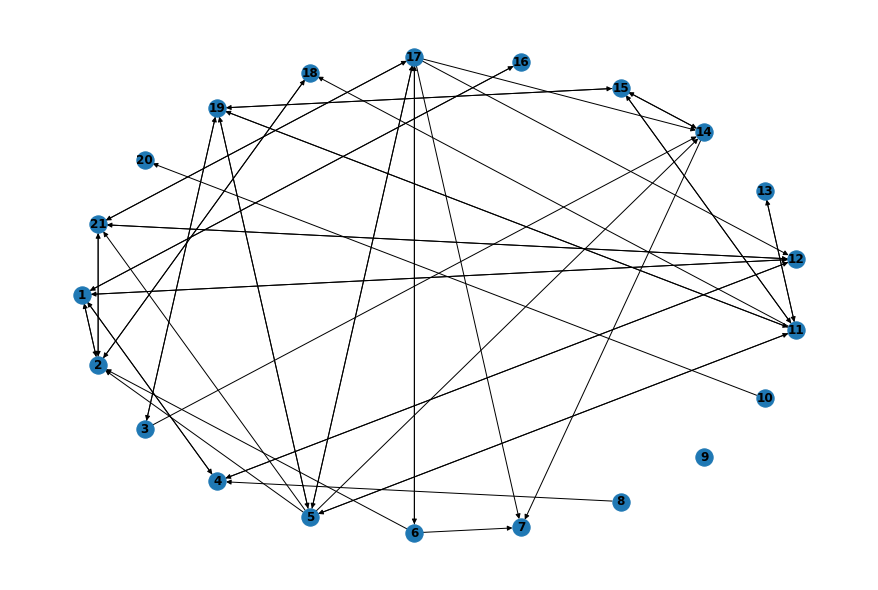

In [34]:
# create las graph and plot it
data2_las = locally_aggregated_structures(data2)
G2_las = plot_network(data2_las)

nx.draw_shell(G2_las, with_labels=True, font_weight='bold')

In [35]:
# conclusion:
# LAS is better for the task of identifying cliques, it is hard to confirm 
# friendship constellations you are not part of.

In [36]:
# compute all cliques found in the LAS network
G2_las_undir = G2_las.to_undirected()
cliques = list(nx.algorithms.find_cliques(G2_las_undir))
cliques

[[1, 16],
 [1, 2],
 [1, 4, 12],
 [3, 19],
 [3, 14],
 [4, 8],
 [5, 19, 11],
 [5, 17, 21],
 [5, 17, 14],
 [5, 2, 21],
 [6, 17, 7],
 [6, 2],
 [7, 17, 14],
 [9],
 [10, 20],
 [12, 21, 17],
 [13, 11],
 [15, 11, 19],
 [15, 14],
 [18, 2],
 [18, 11]]

In [37]:
# create one dataframe per employee
for i in range(1,22):
    globals()['df_k%s' % i] = create_df_kth_slices(data[i-1])
    
df_k1

,K Out Degree,K In Degree,K betweenness
1,6,18,0.014809
2,10,18,0.014809
3,7,13,0.004948
4,10,8,0.004769
5,12,12,0.005738
6,19,13,0.017178
7,18,7,0.008495
8,11,14,0.006164
9,14,11,0.001404
10,12,11,0.007369


In [38]:
from itertools import combinations

clique_corr = dict()
for i in range(len(cliques)):
    clique = cliques[i]
    combs = list(combinations(clique, 2))
    pair_corr = dict()
    for pair in combs:
        corr_in = globals()[f"df_k{pair[0]}"]['K In Degree'].corr(globals()[f"df_k{pair[1]}"]['K In Degree'])
        corr_out = globals()[f"df_k{pair[0]}"]['K Out Degree'].corr(globals()[f"df_k{pair[1]}"]['K Out Degree'])
        corr_mean = (corr_in+corr_out)/2
        pair_corr[pair] = corr_mean
    clique_corr[i] = pair_corr

In [39]:
clique_corr

{0: {(1, 16): 0.038311016677365535},
 1: {(1, 2): 0.2120058564138825},
 2: {(1, 4): 0.3811218499428551,
  (1, 12): 0.28192055144297884,
  (4, 12): 0.33213093998607196},
 3: {(3, 19): 0.3509257462709968},
 4: {(3, 14): 0.26525898144305143},
 5: {(4, 8): 0.3465484064374801},
 6: {(5, 19): 0.5841206111408255,
  (5, 11): 0.5045599503560649,
  (19, 11): 0.56708380422684},
 7: {(5, 17): 0.21924966850279812,
  (5, 21): 0.23528803637693624,
  (17, 21): 0.3045988280622552},
 8: {(5, 17): 0.21924966850279812,
  (5, 14): 0.5771292220326724,
  (17, 14): 0.5307219536354272},
 9: {(5, 2): 0.3974909346864544,
  (5, 21): 0.23528803637693624,
  (2, 21): 0.4288109038627557},
 10: {(6, 17): 0.470798402696441,
  (6, 7): 0.33147361888554716,
  (17, 7): 0.46530708016610434},
 11: {(6, 2): 0.45977582107740433},
 12: {(7, 17): 0.46530708016610434,
  (7, 14): 0.12301774101969852,
  (17, 14): 0.5307219536354272},
 13: {},
 14: {(10, 20): 0.33913902980553784},
 15: {(12, 21): 0.433688163538117,
  (12, 17): 0.521

In [40]:
## by looking at correlations within cliques:
# lowest friend-to-friend correlation for: 
# 7&14 (approx. 0.123),
# 5%17 (approx. 0.219),
# 1&2 (approx. 0.212).

In [41]:
# general observations 